In [1]:
#Importing libraries.
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#Loading in the dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape = ", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)


In [3]:
#Data Preprocessing.
#CNN expects input to be NxHxWxC, we only have NxHxW.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape = ", x_train.shape)
#By typecasting y_train into a set(can only store unique elements), we find number of target classes.
K = len(set(y_train))
print('Number of classes: ', K)

x_train.shape =  (60000, 28, 28, 1)
Number of classes:  10


In [4]:
#Building the model using the Keras Functional API.
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = (2, 2), strides = 2)(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [5]:
#Compiling and Fitting(Use GPU)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data =  (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4860 - accuracy: 0.8461 - val_loss: 0.3456 - val_accuracy: 0.8688
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3044 - accuracy: 0.8895 - val_loss: 0.3052 - val_accuracy: 0.8853
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2648 - accuracy: 0.9039 - val_loss: 0.2727 - val_accuracy: 0.8991
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2407 - accuracy: 0.9110 - val_loss: 0.2765 - val_accuracy: 0.9059
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2274 - accuracy: 0.9158 - val_loss: 0.2840 - val_accuracy: 0.8978
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2133 - accuracy: 0.9215 - val_loss: 0.2753 - val_accuracy: 0.9049
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2001 - accuracy: 0.9260 - val_loss: 0.2819 - val_accuracy

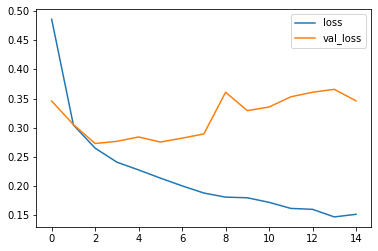

In [6]:
#Loss per iteration.
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

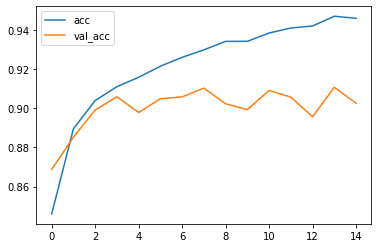

In [7]:
#Accuracy per iteration.
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()